In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection #import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics  # mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2_score
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.metrics import max_error
from sklearn.decomposition import PCA
from sklearn import preprocessing

### Data Source ###

___Training Data:___  The aircraft engine run-to-failure data.
[download trianing data](http://azuremlsamples.azureml.net/templatedata/PM_train.txt)  
___Test Data:___ The aircraft engine operating data without failure events recorded.
[download test data](http://azuremlsamples.azureml.net/templatedata/PM_test.txt)  
___Ground Truth Data:___ The true remaining cycles for each engine in the testing data.
[download truth data](http://azuremlsamples.azureml.net/templatedata/PM_truth.txt)  

For simplicity, data files have been downloaded to local Data folder.

### Data Columns

•	__id__: is the engine ID, ranging from 1 to 100  
•	__cycle__: per engine sequence, starts from 1 to the cycle number where failure had happened (trining data only) 
•	__setting1__ to __setting3__: engine operational settings  
•	__s1__ to __s21__: sensors measurements  


In [2]:
#dataset column names:

col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21','s22','s23']


### Load Training Data:

In [3]:
#load training data

df_train_raw = pd.read_csv('../input/PM_train.txt', sep = ' ', header=None)
df_train_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [4]:

#assign column names

df_train_raw.columns = col_names
df_train_raw.head()


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [5]:
df_train_raw.id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [6]:
#drop extra space columnn

df_train_raw=df_train_raw.drop(columns=['s22','s23'])
df_train_raw.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
# get some stat

df_train_raw.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


There are 100 engines. each engine has between 1 to 362 cycles (average of 108 cycles per engine). The last cycle for each engine represents the cycle when failure had happened.

In [8]:
# check the data types

df_train_raw.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19         float64
s20         float64
s21         float64
dtype: object

All data columns are numeric.

No missing values. This is a clean dataset!

In [9]:
df_train_raw.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

### Load Test Data:

In [10]:
#load test data

df_test_raw = pd.read_csv('../input/PM_test.txt', sep = ' ', header=None)
df_test_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [11]:
# #drop extra space columnn
# df_test_raw.drop([26,27], axis=1, inplace='True')

#assign column names
df_test_raw.columns = col_names
df_test_raw.head()


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [12]:
#drop extra space columnn

df_test_raw=df_test_raw.drop(columns=['s22','s23'])

In [13]:
# get some stat on test data

df_test_raw.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,1.309600e+04,13096.000000,13096.000000,13096.000000,1.309600e+04,...,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,100.0,5.186700e+02,642.475088,1588.099204,1404.735362,1.462000e+01,...,521.747724,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743
std,28.289423,53.057749,0.002203,0.000294,0.0,6.014263e-11,0.400899,5.003274,6.688309,2.671743e-12,...,0.559627,0.056934,10.188605,0.029009,8.823140e-15,1.233577,0.0,0.0,0.141681,0.084120
min,1.000000,1.000000,-0.008200,-0.000600,100.0,5.186700e+02,641.130000,1569.040000,1384.390000,1.462000e+01,...,519.380000,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.197500,1584.600000,1399.950000,1.462000e+01,...,521.380000,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600
50%,52.000000,69.000000,0.000000,0.000000,100.0,5.186700e+02,642.460000,1587.990000,1404.440000,1.462000e+01,...,521.780000,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200
75%,76.000000,113.000000,0.001500,0.000300,100.0,5.186700e+02,642.740000,1591.362500,1409.050000,1.462000e+01,...,522.150000,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600
max,100.000000,303.000000,0.007800,0.000700,100.0,5.186700e+02,644.300000,1607.550000,1433.360000,1.462000e+01,...,523.760000,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900


In [14]:
df_test_raw.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

Same as training data, there are 100 engines, each engine has between 1 to 303 cycles (average of 76 cycles per engine). But this time, failure cycle was not provided.  

Failure events for test data - remaining cycles before failure (TTF) - were provided in a separate truth file.

### Load Truth Data:

In [15]:
# Load the truth data - actual 'ttf' for test data

df_truth = pd.read_csv('../input/PM_truth.txt', sep = ' ', header=None)
df_truth.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [16]:
#drop extra empty column in the truth data and rename remaining 'ttf'

# df_truth.drop([1], axis=1, inplace='True')
df_truth.columns = ['ttf','1']
df_truth=df_truth.drop(columns=['1'])
df_truth.head()

,ttf
0,112
1,98
2,69
3,82
4,91


In [17]:
#get some stat on truth data

df_truth.describe()

,ttf
count,100.00000
mean,75.52000
std,41.76497
min,7.00000
25%,32.75000
50%,86.00000
75%,112.25000
max,145.00000


To get meaningful test data, we need to merge the truth data (TTF) with last cycle for each engine in the test data. This will give us a test set of 100 engines with their TTF data. Will do that later when we create regression and classification labels for both training and test data. 

But now let us add some features to smooth the sensors reading: rolling average and rolling standard deviation.


### Feature Extraction:

Create helper function to create features based on smoothing the time series for sensors by adding rolling mean and rolling standard deviation

In [18]:

def add_features(df_in, rolling_win_size):
    
    """Add rolling average and rolling standard deviation for sensors readings using fixed rolling window size.
    
    Args:
            df_in (dataframe)     : The input dataframe to be proccessed (training or test) 
            rolling_win_size (int): The window size, number of cycles for applying the rolling function
        
    Reurns:
            dataframe: contains the input dataframe with additional rolling mean and std for each sensor
    
    """
    
    sensor_cols = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
    
    sensor_av_cols = [nm.replace('s', 'av') for nm in sensor_cols]
    sensor_sd_cols = [nm.replace('s', 'sd') for nm in sensor_cols]
    
    df_out = pd.DataFrame()
    
    ws = rolling_win_size
    
    #calculate rolling stats for each engine id
    
    for m_id in pd.unique(df_in.id):
    
        # get a subset for each engine sensors
        df_engine = df_in[df_in['id'] == m_id]
        df_sub = df_engine[sensor_cols]

    
        # get rolling mean for the subset
        av = df_sub.rolling(ws, min_periods=1).mean()
        av.columns = sensor_av_cols
    
        # get the rolling standard deviation for the subset
        sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
        sd.columns = sensor_sd_cols
    
        # combine the two new subset dataframes columns to the engine subset
        new_ftrs = pd.concat([df_engine,av,sd], axis=1)
    
        # add the new features rows to the output dataframe
        df_out = pd.concat([df_out,new_ftrs])
        
    return df_out

create helper function to add the regression and classification labels to the training data

In [19]:

def prepare_train_data (df_in, period):
    
    """Add regression and classification labels to the training data.

        Regression label: ttf (time-to-failure) = each cycle# for an engine subtracted from the last cycle# of the same engine
        Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 2
        
      Args:
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for TTF segmentation. Used to derive classification labels
          
      Returns:
          dataframe: The input dataframe with regression and classification labels added
          
    """
    
    #create regression label
    
    #make a dataframe to hold the last cycle for each enginge in the dataset
    df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
    df_max_cycle.reset_index(level=0 , inplace=True)
    df_max_cycle.columns = ['id', 'last_cycle']

    #add time-to-failure ttf as a new column - regression label
    df_in = pd.merge(df_in, df_max_cycle, on='id')
    df_in['ttf'] = df_in['last_cycle'] - df_in['cycle']
    df_in.drop(['last_cycle'], axis=1 , inplace=True)
    
#     #create binary classification label
#     df_in['label_bnc'] = df_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
#     #create multi-class classification label
#     df_in['label_mcc'] = df_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)
    
    return df_in
    

In [20]:
df_max_cycle = pd.DataFrame(df_train_raw.groupby('id')['cycle'].max())
df_max_cycle.reset_index(level=0 , inplace=True)
df_max_cycle.columns = ['id', 'last_cycle']
df_max_cycle.describe()

,id,last_cycle
count,100.000000,100.000000
mean,50.500000,206.310000
std,29.011492,46.342749
min,1.000000,128.000000
25%,25.750000,177.000000
50%,50.500000,199.000000
75%,75.250000,229.250000
max,100.000000,362.000000


In [21]:
df_max_cycle

,id,last_cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
5,6,188
6,7,259
7,8,150
8,9,201
9,10,222


In [22]:
df_max_cycle.describe()

,id,last_cycle
count,100.000000,100.000000
mean,50.500000,206.310000
std,29.011492,46.342749
min,1.000000,128.000000
25%,25.750000,177.000000
50%,50.500000,199.000000
75%,75.250000,229.250000
max,100.000000,362.000000


create helper function to add the regression and classification labels to the training data

In [23]:
# https://github.com/Samimust/predictive-maintenance
def prepare_test_data(df_test_in, df_truth_in, period):
    
    """Add regression and classification labels to the test data.

        Regression label: ttf (time-to-failure) = extract the last cycle for each enginge and then merge the record with the truth data
        Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 2
        
      Args:
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for TTF segmentation. Used to derive classification labels
          
      Returns:
          dataframe: The input dataframe with regression and classification labels added
    

    
    """
    
    df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max())
    
    df_tst_last_cycle.reset_index(level=0, inplace=True)
    df_tst_last_cycle.columns = ['id', 'last_cycle']
#     , inplace=True
    df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')


    df_test_in = df_test_in[df_test_in['cycle'] == df_test_in['last_cycle']]

    df_test_in.drop(['last_cycle'], axis=1, inplace=True)
    
    df_test_in.reset_index(drop=True, inplace=True)
    
    df_test_in = pd.concat([df_test_in, df_truth], axis=1)
    
#     #create binary classification label
#     df_test_in['label_bnc'] = df_test_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
#     #create multi-class classification label
#     df_test_in['label_mcc'] = df_test_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)

    return df_test_in

With the help of these functions, let us prepare training and test data by adding features and labels

### Prepare the Training Data:

In [24]:
# add extracted features to training data

df_train_fx = add_features(df_train_raw, 5)
df_train_fx.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.438406,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.404475,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.495950,0.029439,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.432574,0.025884,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498


In [25]:
#add labels to training data using period of 30 cycles for classification

df_train = prepare_train_data (df_train_fx, 30)
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.029439,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025884,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187


In [26]:
df_train.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,0.028451,3.016360,0.018802,0.0,0.885173,0.0,0.0,0.094636,0.056483,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.011049,1.143912,0.007103,0.0,0.341989,0.0,0.0,0.034867,0.020669,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,0.020736,2.219386,0.013724,0.0,0.547723,0.0,0.0,0.070071,0.041825,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,0.027749,2.939243,0.018365,0.0,0.836660,0.0,0.0,0.092736,0.055555,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,0.035355,3.715888,0.023380,0.0,1.140175,0.0,0.0,0.117132,0.069839,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,0.220068,9.919746,0.065761,0.0,2.828427,0.0,0.0,0.325269,0.187313,361.000000


In [27]:
x=df_train[df_train.ttf==30]
y=x[x.id<10]
y

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
161,1,162,-0.0005,0.0004,100.0,518.67,643.15,1592.22,1423.48,14.62,...,0.020000,2.135608,0.027500,0.0,0.894427,0.0,0.0,0.107610,0.058820,30
448,2,257,0.0000,-0.0002,100.0,518.67,643.06,1593.17,1426.94,14.62,...,0.014142,2.014341,0.027207,0.0,0.894427,0.0,0.0,0.064653,0.034585,30
627,3,149,0.0014,-0.0000,100.0,518.67,643.26,1594.66,1414.51,14.62,...,0.028810,2.950480,0.027382,0.0,1.095445,0.0,0.0,0.075631,0.036045,30
816,4,159,0.0020,0.0005,100.0,518.67,642.82,1590.08,1417.62,14.62,...,0.029665,6.413882,0.016204,0.0,1.000000,0.0,0.0,0.075829,0.034319,30
1085,5,239,-0.0038,0.0002,100.0,518.67,643.05,1601.15,1418.73,14.62,...,0.028810,2.841765,0.019896,0.0,0.894427,0.0,0.0,0.034351,0.046441,30
1273,6,158,-0.0028,0.0004,100.0,518.67,643.66,1596.43,1422.25,14.62,...,0.019494,4.578360,0.007745,0.0,0.707107,0.0,0.0,0.082885,0.039518,30
1532,7,229,-0.0024,-0.0001,100.0,518.67,643.53,1593.53,1418.82,14.62,...,0.014142,2.221234,0.019255,0.0,0.894427,0.0,0.0,0.072111,0.075023,30
1682,8,120,0.0003,-0.0002,100.0,518.67,643.44,1600.04,1417.09,14.62,...,0.018166,2.332891,0.010026,0.0,1.303840,0.0,0.0,0.113358,0.081287,30
1883,9,171,0.0024,0.0002,100.0,518.67,642.34,1587.08,1418.00,14.62,...,0.048477,5.856034,0.018935,0.0,1.000000,0.0,0.0,0.145190,0.072786,30


In [28]:
df_train.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19         float64
s20         float64
s21         float64
av1         float64
av2         float64
av3         float64
av4         float64
             ...   
av14        float64
av15        float64
av16        float64
av17        float64
av18        float64
av19        float64
av20        float64
av21        float64
sd1         float64
sd2         float64
sd3         float64
sd4         float64
sd5         float64
sd6         float64
sd7         float64
sd8         float64
sd9         float64
sd10        float64
sd11        float64


Rolling average, rolling standard deviation, regression labels, and classification labels have been added to the training data.  

Let us save the dataframe for later use in data exploration and modeling phases.

In [29]:
# save the training data to csv file for later use

df_train.to_csv('train.csv', index=False)

### Prepare the Test Data:

In [30]:
# add extracted features to test data

df_test_fx = add_features(df_test_raw, 5)
df_test_fx.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,0.311127,0.021213,9.948992,0.017607,0.0,0.707107,0.0,0.0,0.113137,0.012799
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,0.220681,0.017321,7.179807,0.032155,0.0,0.577350,0.0,0.0,0.113725,0.021642
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,0.337182,0.015000,5.890096,0.027781,0.0,0.957427,0.0,0.0,0.093095,0.020353
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,0.329742,0.014142,5.222300,0.024080,0.0,1.303840,0.0,0.0,0.080623,0.020672


In [31]:
df_test_fx['id'].value_counts()

49     303
93     244
91     234
62     232
12     217
81     213
76     205
34     203
100    198
35     198
31     196
13     195
10     192
52     189
68     187
24     186
20     184
89     177
58     176
43     172
84     172
29     171
64     168
8      166
17     165
53     164
82     162
77     162
57     160
7      160
      ... 
5       98
96      97
99      97
59      94
95      89
75      88
11      83
48      78
26      76
15      76
50      74
83      73
47      73
78      72
65      71
67      71
88      68
71      68
87      56
9       55
44      54
69      54
33      50
2       49
25      48
14      46
22      39
39      37
85      34
1       31
Name: id, Length: 100, dtype: int64

In [32]:
# df_test_fx=df_test_fx[df_test_fx.id==1]
# df_test_fx=df_test_fx[df_test_fx.cycle==31]
# df_test_fx

In [33]:
#add labels to test data using period of 30 cycles for classification
df_test = prepare_test_data(df_test_fx, df_truth, 30)
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.028810,3.302941,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.008367,1.370062,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.029665,2.979090,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.027019,0.622953,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.023022,1.923609,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91


In [34]:
df_test.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19         float64
s20         float64
s21         float64
av1         float64
av2         float64
av3         float64
av4         float64
             ...   
av14        float64
av15        float64
av16        float64
av17        float64
av18        float64
av19        float64
av20        float64
av21        float64
sd1         float64
sd2         float64
sd3         float64
sd4         float64
sd5         float64
sd6         float64
sd7         float64
sd8         float64
sd9         float64
sd10        float64
sd11        float64


Rolling average, rolling standard deviation, regression labels, and classification labels have been added to the test data.  

Let us save the dataframe for later use in data exploration and modeling phases

In [35]:
# save the test data to csv file for later use

df_test.to_csv('test.csv', index=False)

# Load train data


In [36]:
df_tr_lbl = pd.read_csv('train.csv')
df_tr_lbl.head(10)


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.029439,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025884,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,0.023452,0.958697,0.025727,0.0,1.140175,0.0,0.0,0.051186,0.031436,186
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,0.021679,0.643141,0.023476,0.0,1.140175,0.0,0.0,0.086718,0.021634,185
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,0.021679,1.149274,0.022477,0.0,0.836660,0.0,0.0,0.086487,0.034405,184
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,0.008944,3.205438,0.020740,0.0,0.836660,0.0,0.0,0.077136,0.038939,183
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,0.014142,2.883881,0.020493,0.0,0.836660,0.0,0.0,0.062849,0.058103,182


In [37]:
df_tr_lbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 69 columns):
id          20631 non-null int64
cycle       20631 non-null int64
setting1    20631 non-null float64
setting2    20631 non-null float64
setting3    20631 non-null float64
s1          20631 non-null float64
s2          20631 non-null float64
s3          20631 non-null float64
s4          20631 non-null float64
s5          20631 non-null float64
s6          20631 non-null float64
s7          20631 non-null float64
s8          20631 non-null float64
s9          20631 non-null float64
s10         20631 non-null float64
s11         20631 non-null float64
s12         20631 non-null float64
s13         20631 non-null float64
s14         20631 non-null float64
s15         20631 non-null float64
s16         20631 non-null float64
s17         20631 non-null int64
s18         20631 non-null int64
s19         20631 non-null float64
s20         20631 non-null float64
s21         20631 non-nu

In [38]:
#exclude enging id and cycle number from the input features:

featurs = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

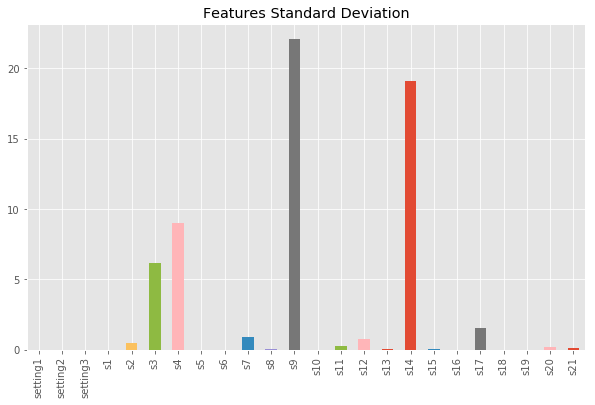

In [39]:
#plot and compare the standard deviation of input features:

df_tr_lbl[featurs].std().plot(kind='bar', figsize=(10,6), title="Features Standard Deviation")

In [40]:
df_tr_lbl[featurs].std().sort_values(ascending=False)

s9          2.208288e+01
s14         1.907618e+01
s4          9.000605e+00
s3          6.131150e+00
s17         1.548763e+00
s7          8.850923e-01
s12         7.375534e-01
s2          5.000533e-01
s11         2.670874e-01
s20         1.807464e-01
s21         1.082509e-01
s13         7.191892e-02
s8          7.098548e-02
s15         3.750504e-02
setting1    2.187313e-03
s6          1.388985e-03
setting2    2.930621e-04
s1          6.537152e-11
s5          3.394700e-12
s10         4.660829e-13
s16         1.556432e-14
s18         0.000000e+00
s19         0.000000e+00
setting3    0.000000e+00
dtype: float64

In [41]:
# get ordered list features correlation with regression label ttf
df_tr_lbl[featurs].corrwith(df_tr_lbl.ttf).sort_values(ascending=False)

s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -6.041754e-16
s5         -6.041754e-16
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

In [42]:
df_tr_lbl[df_tr_lbl.s5==14.62]["s5"].value_counts()

14.62    20631
Name: s5, dtype: int64

In [43]:
df_tr_lbl["s5"].std()

3.3947001929194767e-12

In [44]:
# list of features having low or no correlation with regression label ttf and very low or no variance
# These features will be target for removal in feature selection
low_cor_featrs = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting2', 'setting1']
df_tr_lbl[low_cor_featrs].describe()

,setting3,s1,s10,s18,s19,s16,s5,setting2,setting1
count,20631.0,2.063100e+04,2.063100e+04,20631.0,20631.0,2.063100e+04,2.063100e+04,20631.000000,20631.000000
mean,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000002,-0.000009
std,0.0,6.537152e-11,4.660829e-13,0.0,0.0,1.556432e-14,3.394700e-12,0.000293,0.002187
min,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,-0.000600,-0.008700
25%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,-0.000200,-0.001500
50%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000000,0.000000
75%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000300,0.001500
max,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000600,0.008700


In [45]:
# list of features having high correlation with regression label ttf

correl_featurs = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']

df_tr_lbl[correl_featurs].describe()

,s12,s7,s21,s20,s6,s14,s9,s13,s8,s3,s17,s2,s15,s4,s11
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,521.413470,553.367711,23.289705,38.816271,21.609803,8143.752722,9065.242941,2388.096152,2388.096652,1590.523119,393.210654,642.680934,8.442146,1408.933782,47.541168
std,0.737553,0.885092,0.108251,0.180746,0.001389,19.076176,22.082880,0.071919,0.070985,6.131150,1.548763,0.500053,0.037505,9.000605,0.267087
min,518.690000,549.850000,22.894200,38.140000,21.600000,8099.940000,9021.730000,2387.880000,2387.900000,1571.040000,388.000000,641.210000,8.324900,1382.250000,46.850000
25%,520.960000,552.810000,23.221800,38.700000,21.610000,8133.245000,9053.100000,2388.040000,2388.050000,1586.260000,392.000000,642.325000,8.414900,1402.360000,47.350000
50%,521.480000,553.440000,23.297900,38.830000,21.610000,8140.540000,9060.660000,2388.090000,2388.090000,1590.100000,393.000000,642.640000,8.438900,1408.040000,47.510000
75%,521.950000,554.010000,23.366800,38.950000,21.610000,8148.310000,9069.420000,2388.140000,2388.140000,1594.380000,394.000000,643.000000,8.465600,1414.555000,47.700000
max,523.380000,556.060000,23.618400,39.430000,21.610000,8293.720000,9244.590000,2388.560000,2388.560000,1616.910000,400.000000,644.530000,8.584800,1441.490000,48.530000


['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11'] could be target for feature selection during modeling since their correlation with TTF is higher than other features.  

Let us disply this correlation in heatmap

In [46]:
# add the regression label 'ttf' to the list of high corr features 

correl_featurs_lbl = correl_featurs + ['ttf']
correl_featurs_lbl

['s12',
 's7',
 's21',
 's20',
 's6',
 's14',
 's9',
 's13',
 's8',
 's3',
 's17',
 's2',
 's15',
 's4',
 's11',
 'ttf']

In [47]:
df_tr_lbl[correl_featurs_lbl].corr()

,s12,s7,s21,s20,s6,s14,s9,s13,s8,s3,s17,s2,s15,s4,s11,ttf
s12,1.000000,0.812713,0.756263,0.751943,-0.155884,-0.098141,-0.210238,-0.788441,-0.786540,-0.680307,-0.703485,-0.724578,-0.766052,-0.815591,-0.846884,0.671983
s7,0.812713,1.000000,0.737447,0.736163,-0.155720,-0.110053,-0.217835,-0.764611,-0.767132,-0.664595,-0.692893,-0.702136,-0.747051,-0.793130,-0.822805,0.657223
s21,0.756263,0.737447,1.000000,0.693480,-0.137419,-0.192415,-0.292795,-0.688948,-0.688840,-0.633901,-0.658710,-0.668050,-0.704043,-0.745193,-0.772554,0.635662
s20,0.751943,0.736163,0.693480,1.000000,-0.141419,-0.187364,-0.285280,-0.686172,-0.687030,-0.625941,-0.651021,-0.661841,-0.707671,-0.748067,-0.771510,0.629428
s6,-0.155884,-0.155720,-0.137419,-0.141419,1.000000,-0.002112,0.019347,0.158276,0.152161,0.116039,0.130810,0.132242,0.149042,0.150480,0.160014,-0.128348
s14,-0.098141,-0.110053,-0.192415,-0.187364,-0.002112,1.000000,0.963157,-0.147036,-0.144787,0.237137,0.246621,0.179752,0.193761,0.190748,0.163408,-0.306769
s9,-0.210238,-0.217835,-0.292795,-0.285280,0.019347,0.963157,1.000000,-0.034763,-0.032091,0.322964,0.337110,0.273764,0.293753,0.297429,0.274591,-0.390102
s13,-0.788441,-0.764611,-0.688948,-0.686172,0.158276,-0.147036,-0.034763,1.000000,0.826084,0.600963,0.627410,0.661792,0.697662,0.745158,0.780761,-0.562569
s8,-0.786540,-0.767132,-0.688840,-0.687030,0.152161,-0.144787,-0.032091,0.826084,1.000000,0.602481,0.627785,0.662325,0.700949,0.746852,0.782213,-0.563968
s3,-0.680307,-0.664595,-0.633901,-0.625941,0.116039,0.237137,0.322964,0.600963,0.602481,1.000000,0.600017,0.602610,0.639921,0.678413,0.695900,-0.584520


In [48]:
# # most correlated features
# corrmat = df_tr_lbl.corr()
# top_corr_features = corrmat.index[abs(corrmat["ttf"])>0.6]
# plt.figure(figsize=(20,10))
# g = sns.heatmap(df_tr_lbl[top_corr_features].corr(),annot=True,cmap="RdYlGn")

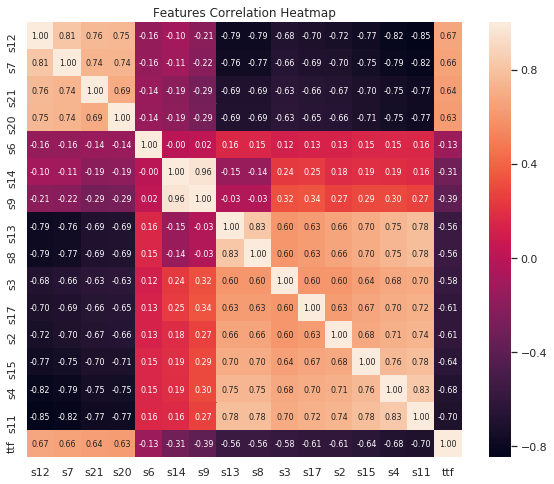

In [49]:
# plot a heatmap to display +ve and -ve correlation among features and regression label:

import seaborn as sns
cm = np.corrcoef(df_tr_lbl[correl_featurs_lbl].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=correl_featurs_lbl, xticklabels=correl_featurs_lbl)
plt.title('Features Correlation Heatmap')
plt.show()

There is a very high correlation (> 0.8) between some features: (s14, s9), (s11, s4), (s11, s7), (s11, s12), (s4, s12), (s8,s13), (s7, s12)
This may hurt the performance of some ML algorithms. 
So, some of the above features will be target for removal in feature selection


Let us create a helper function to ease exploration of each feature invidually:

In [50]:
def explore_col(s):
    
    """Plot 4 main graphs for a single feature.
    
        plot1: histogram 
        plot2: boxplot 
        plot3: line plot (time series over cycle)
        plot4: scatter plot vs. regression label ttf
        
    Args:
        s (str): The column name of the feature to be plotted.
        e (int): The number of random engines to be plotted for plot 3. Range from 1 -100, 0:all engines, >100: all engines.

    Returns:
        plots
    
    """
    
    fig = plt.figure(figsize=(10, 8))


    sub1 = fig.add_subplot(221) 
    sub1.set_title(s +' histogram') 
    sub1.hist(df_tr_lbl[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df_tr_lbl[s])
    
    sub3 = fig.add_subplot(224)
    sub3.set_title("scatter: "+ s + " /ttf (regr label)")
    sub3.set_xlabel('ttf')
    sub3.scatter(df_tr_lbl['ttf'],df_tr_lbl[s])
    plt.tight_layout()
    plt.show()

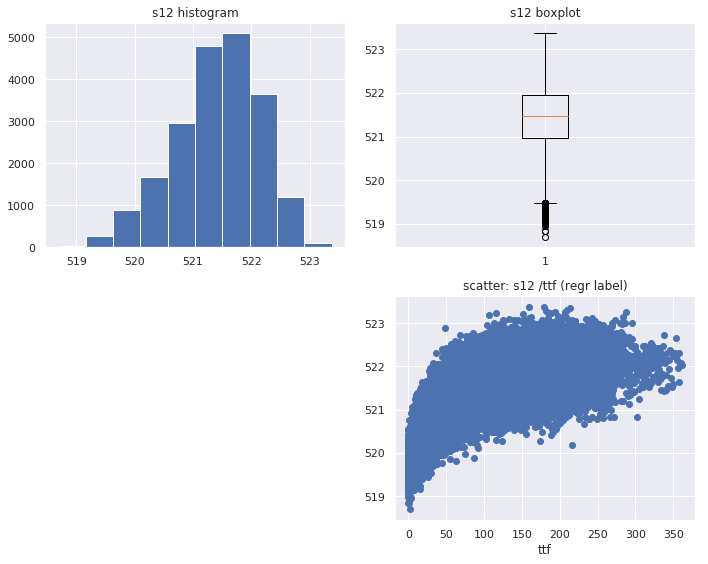

In [51]:
explore_col("s12")

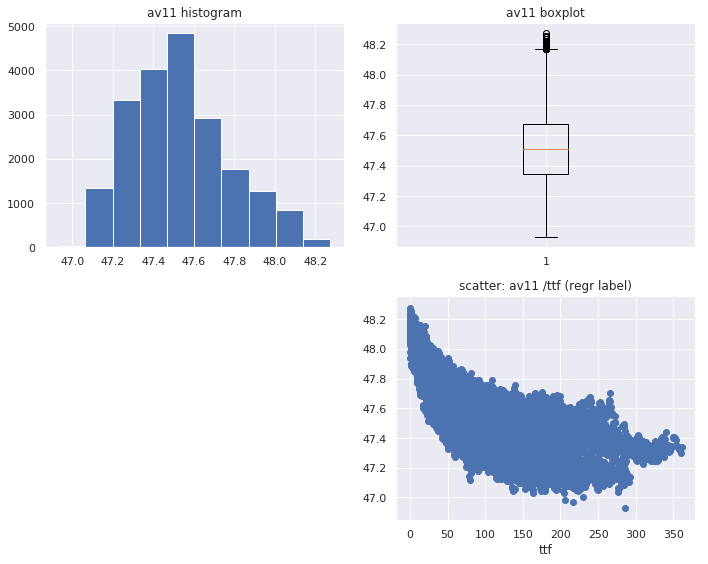

In [52]:
explore_col("av11")

# Load test data

In [53]:
df_test = pd.read_csv('test.csv')
df_test

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.028810,3.302941,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.008367,1.370062,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.029665,2.979090,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.027019,0.622953,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.023022,1.923609,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91
5,6,105,0.0076,-0.0003,100.0,518.67,643.05,1586.94,1404.49,14.62,...,0.028810,4.295634,0.007488,0.0,0.447214,0.0,0.0,0.153395,0.071794,93
6,7,160,0.0016,-0.0001,100.0,518.67,642.10,1589.59,1413.57,14.62,...,0.032094,2.739885,0.016718,0.0,0.000000,0.0,0.0,0.098387,0.063694,91
7,8,166,0.0016,-0.0005,100.0,518.67,642.59,1591.91,1413.89,14.62,...,0.023022,2.017424,0.018301,0.0,0.447214,0.0,0.0,0.054314,0.036437,95
8,9,55,-0.0003,0.0004,100.0,518.67,642.27,1593.61,1410.27,14.62,...,0.038341,3.909556,0.013525,0.0,0.836660,0.0,0.0,0.015166,0.047928,111
9,10,192,-0.0018,0.0004,100.0,518.67,643.00,1589.50,1398.99,14.62,...,0.016733,3.062243,0.030489,0.0,0.836660,0.0,0.0,0.087920,0.055861,96


In [54]:
dt=df_test["cycle"]+df_test["ttf"]
dt.describe()

count    100.000000
mean     206.480000
std       44.041872
min      141.000000
25%      174.750000
50%      199.000000
75%      227.750000
max      341.000000
dtype: float64

In [55]:
df_test.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
count,100.000000,100.000000,100.000000,100.000000,100.0,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,...,100.000000,100.000000,100.000000,100.0,100.000000,100.0,100.0,100.000000,100.000000,100.00000
mean,50.500000,130.960000,-0.000073,0.000022,100.0,5.186700e+02,642.768400,1591.824700,1410.548200,1.462000e+01,...,0.028907,3.100803,0.019207,0.0,0.889000,0.0,0.0,0.093899,0.057975,75.52000
std,29.011492,53.593479,0.002353,0.000306,0.0,1.142596e-12,0.444592,6.646293,8.626344,2.856489e-14,...,0.010837,1.027647,0.008033,0.0,0.307613,0.0,0.0,0.035885,0.020325,41.76497
min,1.000000,31.000000,-0.005900,-0.000500,100.0,5.186700e+02,641.750000,1576.930000,1389.330000,1.462000e+01,...,0.008367,0.622953,0.004287,0.0,0.000000,0.0,0.0,0.015166,0.018966,7.00000
25%,25.750000,88.750000,-0.001650,-0.000300,100.0,5.186700e+02,642.490000,1587.007500,1403.912500,1.462000e+01,...,0.020736,2.290447,0.013697,0.0,0.707107,0.0,0.0,0.070107,0.042731,32.75000
50%,50.500000,133.500000,-0.000250,0.000100,100.0,5.186700e+02,642.775000,1591.365000,1410.300000,1.462000e+01,...,0.028810,3.184937,0.018009,0.0,0.836660,0.0,0.0,0.088544,0.055796,86.00000
75%,75.250000,164.250000,0.001300,0.000300,100.0,5.186700e+02,643.025000,1597.280000,1416.922500,1.462000e+01,...,0.037014,3.793166,0.023288,0.0,1.140175,0.0,0.0,0.114105,0.072792,112.25000
max,100.000000,303.000000,0.007600,0.000500,100.0,5.186700e+02,644.030000,1607.550000,1428.420000,1.462000e+01,...,0.062048,5.584839,0.049270,0.0,1.483240,0.0,0.0,0.187216,0.115700,145.00000


# Regression Modelling:

In [56]:
#Prepare data for regression model

# original features
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# original + extracted fetures
features_adxf = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

# features with low or no correlation with regression label
features_lowcr = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting1', 'setting2']

# features that have correlation with regression label
features_corrl = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20','s21']
# features_impor = ['s4', 's7', 's9', 's11', 's12']
# a variable to hold the set of features to experiment with

features = features_corrl
X_train = df_train[features]
y_train = df_train['ttf']

X_test = df_test[features]
y_test = df_test['ttf']
# from sklearn.preprocessing import MinMaxScaler
# min_max_scaler = preprocessing.MinMaxScaler()
# X_train = pd.DataFrame(min_max_scaler.fit_transform(X_train),columns=features_corrl)
# X_test = pd.DataFrame(min_max_scaler.fit_transform(X_test),columns=features_corrl )

Create a helper function to calculate regression metrics

In [57]:
def get_regression_metrics(model, actual, predicted):
    
    """Calculate main regression metrics.
    
    Args:
        model (str): The model name identifier
        actual (series): Contains the test label values
        predicted (series): Contains the predicted values
        
    Returns:
        dataframe: The combined metrics in single dataframe
    
    
    """
    x= np.mean(np.abs((actual - predicted) / actual)) * 100
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted),
                        'Max Error' : metrics.max_error(actual, predicted),
                        'Mean absolute percentage error': x
               
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [58]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):
    
    """Plot regression coefficients weights or feature importance.
    
    Args:
        model (str): The model name identifier
        weights (array): Contains the regression coefficients weights or feature importance
        feature_names (list): Contains the corresponding features names
        weights_type (str): 'c' for 'coefficients weights', otherwise is 'feature importance'
        
    Returns:
        plot of either regression coefficients weights or feature importance
        
    
    """
    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px,py))
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'
    plt.xlabel(model + label)
    plt.gca().legend_ = None

Create a helper function to plot the regression residuals

In [59]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    
    """Print the regression residuals.
    
    Args:
        model (str): The model name identifier
        y_train (series): The training labels
        y_train_pred (series): Predictions on training data
        y_test (series): The test labels
        y_test_pred (series): Predictions on test data
        
    Returns:
        Plot of regression residuals
    
    """
    
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()
    

Using the above functions let us model and evaluate some regression algorithms

In [60]:
#try linear regression

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
linreg_metrics


R^2 training: 0.580, R^2 test: 0.409


,Linear Regression
Root Mean Squared Error,31.949775
Mean Absolute Error,25.536288
R^2,0.408879
Explained Variance,0.668094
Max Error,78.650979
Mean absolute percentage error,55.525269


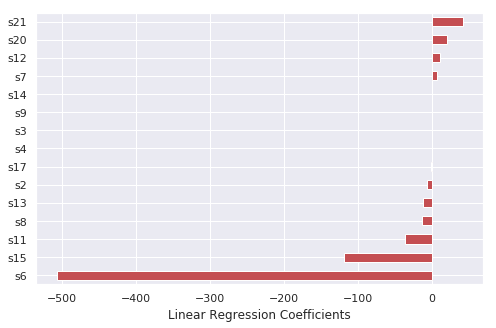

In [61]:
plot_features_weights('Linear Regression', linreg.coef_, X_train.columns, 'c')

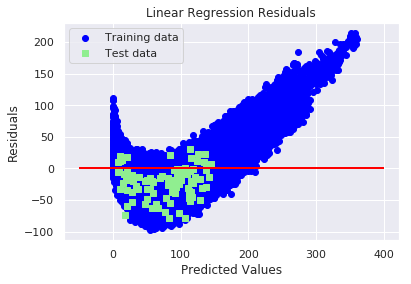

In [62]:
plot_residual('Linear Regression', y_train_predict, y_train, y_test_predict, y_test)

In [63]:
#try LASSO

lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_test_predict = lasso.predict(X_test)
y_train_predict = lasso.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

lasso_metrics = get_regression_metrics('LASSO', y_test, y_test_predict)

lasso_metrics

R^2 training: 0.579, R^2 test: 0.408


,LASSO
Root Mean Squared Error,31.966099
Mean Absolute Error,25.551808
R^2,0.408275
Explained Variance,0.668206
Max Error,78.899491
Mean absolute percentage error,55.493410


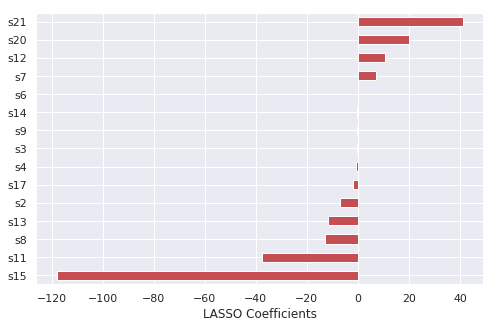

In [64]:
plot_features_weights('LASSO', lasso.coef_, X_train.columns, 'c')

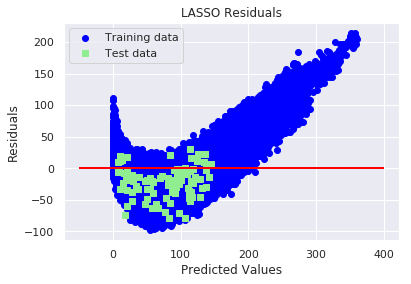

In [65]:
plot_residual('LASSO', y_train_predict, y_train, y_test_predict, y_test)

In [66]:
#try ridge

rdg = linear_model.Ridge(alpha = 0.01)
rdg.fit(X_train, y_train)

y_test_predict = rdg.predict(X_test)
y_train_predict = rdg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rdg_metrics = get_regression_metrics('Ridge Regression', y_test, y_test_predict)
rdg_metrics

R^2 training: 0.580, R^2 test: 0.409


,Ridge Regression
Root Mean Squared Error,31.949864
Mean Absolute Error,25.537263
R^2,0.408876
Explained Variance,0.668173
Max Error,78.692143
Mean absolute percentage error,55.513818


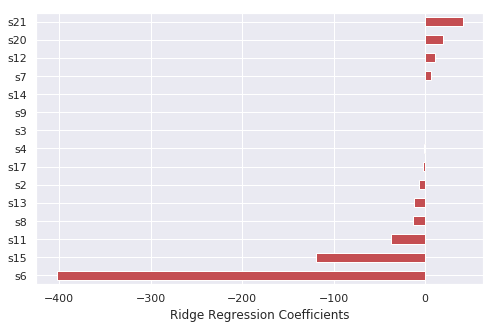

In [67]:
plot_features_weights('Ridge Regression', rdg.coef_, X_train.columns, 'c')

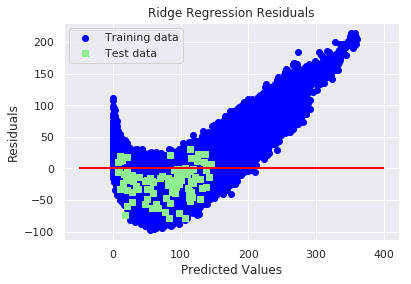

In [68]:
plot_residual('Ridge Regression', y_train_predict, y_train, y_test_predict, y_test)

In [69]:
#try Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_predict = polyreg.predict(X_test_poly)
y_train_predict = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

polyreg_metrics = get_regression_metrics('Polynomial Regression', y_test, y_test_predict)
polyreg_metrics

R^2 training: 0.627, R^2 test: 0.426


,Polynomial Regression
Root Mean Squared Error,31.494186
Mean Absolute Error,24.166435
R^2,0.425617
Explained Variance,0.641575
Max Error,80.195451
Mean absolute percentage error,48.209161


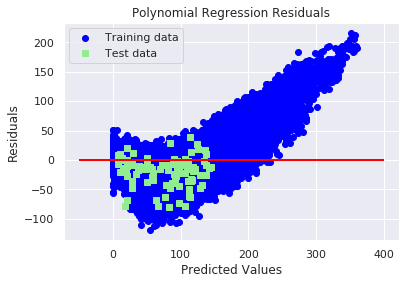

In [70]:
plot_residual('Polynomial Regression', y_train_predict, y_train, y_test_predict, y_test)

In [71]:
#try Decision Tree regressor

#dtrg = DecisionTreeRegressor(max_depth=8, max_features=5, random_state=123) # selected features
dtrg = DecisionTreeRegressor(max_depth=7, random_state=123)
dtrg.fit(X_train, y_train)

y_test_predict = dtrg.predict(X_test)
y_train_predict = dtrg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

dtrg_metrics = get_regression_metrics('Decision Tree Regression', y_test, y_test_predict)

R^2 training: 0.625, R^2 test: 0.403


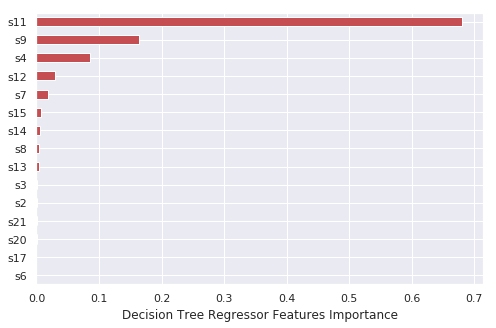

In [72]:
plot_features_weights('Decision Tree Regressor', dtrg.feature_importances_, X_train.columns, 't' )

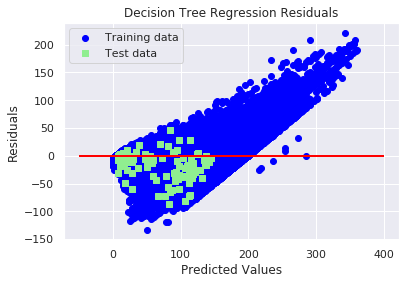

In [73]:
plot_residual('Decision Tree Regression', y_train_predict, y_train, y_test_predict, y_test)

In [74]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [4, 5, 6, 10],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [75]:
#try Random Forest

#rf = RandomForestRegressor(n_estimators=100, max_features=2, max_depth=4, n_jobs=-1, random_state=1) # selected features
rf1 = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=4, n_jobs=-1, random_state=1) # original features
#rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=7, n_jobs=-1, random_state=1) # orig + extrcted 

rf1.fit(X_train, y_train)

y_test_predict = rf1.predict(X_test)
y_train_predict = rf1.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rf1_metrics = get_regression_metrics('Random Forest Regression', y_test, y_test_predict)
rf1_metrics

R^2 training: 0.605, R^2 test: 0.491


,Random Forest Regression
Root Mean Squared Error,29.654652
Mean Absolute Error,23.421295
R^2,0.490756
Explained Variance,0.733323
Max Error,78.265655
Mean absolute percentage error,47.027046


In [76]:
rf2 = RandomForestRegressor(n_estimators=1000, max_features=3, max_depth=10, n_jobs=-1, random_state=1) # original features
#rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=7, n_jobs=-1, random_state=1) # orig + extrcted 

rf2.fit(X_train, y_train)

y_test_predict = rf2.predict(X_test)
y_train_predict = rf2.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rf2_metrics = get_regression_metrics('Random Forest Regression', y_test, y_test_predict)
rf2_metrics

R^2 training: 0.709, R^2 test: 0.446


,Random Forest Regression
Root Mean Squared Error,30.917268
Mean Absolute Error,22.656027
R^2,0.446468
Explained Variance,0.655704
Max Error,85.183783
Mean absolute percentage error,37.533673


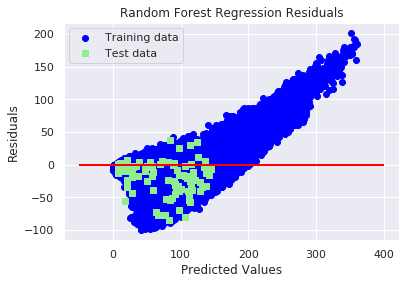

In [77]:
plot_residual('Random Forest Regression', y_train_predict, y_train, y_test_predict, y_test)

Optimal number of features : 5
The selected features are: ['s4', 's7', 's9', 's11', 's12']


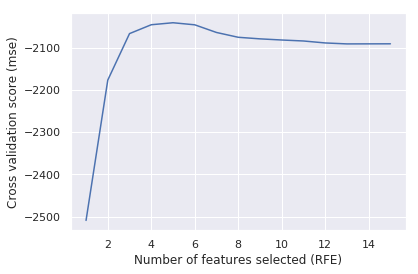

In [78]:
# try recursive feature elimination

kfold = model_selection.KFold(n_splits=5, random_state=10)

dtrg = DecisionTreeRegressor(max_depth=7)

rfecv = RFECV(estimator=dtrg, step=1, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

sel_features = [f for f,s in zip(X_train.columns, rfecv.support_) if s]
print('The selected features are: {}'.format(sel_features))

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected (RFE)")
plt.ylabel("Cross validation score (mse)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

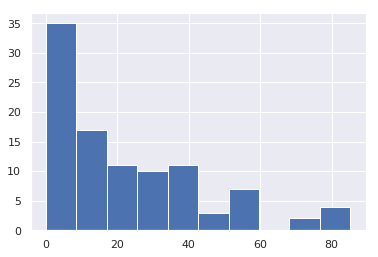

In [79]:
# view predictions vs actual

rf_pred_dict = {
                'Actual' : y_test,
                'Prediction' : y_test_predict
            }
    
rf_pred = pd.DataFrame.from_dict(rf_pred_dict)
abs(rf_pred.Actual-rf_pred.Prediction).hist(bins=10)

## Compare all regression models tested

In [80]:
#regression metrics comparison before feature engineering

reg_metrics_bfe = pd.concat([linreg_metrics, lasso_metrics, rdg_metrics, dtrg_metrics, polyreg_metrics, rf1_metrics,rf2_metrics], axis=1)
reg_metrics_bfe

,Linear Regression,LASSO,Ridge Regression,Decision Tree Regression,Polynomial Regression,Random Forest Regression,Random Forest Regression
Root Mean Squared Error,31.949775,31.966099,31.949864,32.095349,31.494186,29.654652,30.917268
Mean Absolute Error,25.536288,25.551808,25.537263,24.319068,24.166435,23.421295,22.656027
R^2,0.408879,0.408275,0.408876,0.403480,0.425617,0.490756,0.446468
Explained Variance,0.668094,0.668206,0.668173,0.632767,0.641575,0.733323,0.655704
Max Error,78.650979,78.899491,78.692143,87.171683,80.195451,78.265655,85.183783
Mean absolute percentage error,55.525269,55.493410,55.513818,43.115779,48.209161,47.027046,37.533673


In [81]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso

# alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

# lasso = Lasso()

# parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

# ridge_regressor = GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error', cv=5)

# ridge_regressor.fit(X_train, y_train)